### TimML test line-sink discharge

In [1]:
from pylab import *
from timml import *
%matplotlib notebook

In [2]:
ml1 = ModelMaq(kaq=20)
rf1 = Constant(ml1, xr=0, yr=20, hr=30)
ls1 = LineSinkBase(ml1, x1=-10, y1=-10, x2=10, y2=10, Qls=1000)
ml1.solve()

Number of elements, Number of equations: 2 , 1
..
solution complete


In [3]:
print('head at center of line-sink:', ml1.head(ls1.xc, ls1.yc))
print('discharge of line-sink:', ls1.discharge())

head at center of line-sink: [ 19.19104524]
discharge of line-sink: [ 1000.]


In [4]:
ml2 = ModelMaq(kaq=20)
rf2 = Constant(ml2, xr=0, yr=20, hr=30)
N = 20
d = 20 / N
xw = np.arange(-10 + d/2, 10, d)
yw = np.arange(-10 + d/2, 10, d)
for i in range(N):
    Well(ml2, xw[i], yw[i], Qw=1000 / N)
ml2.solve(silent=True)

<IPython.core.display.Javascript object>


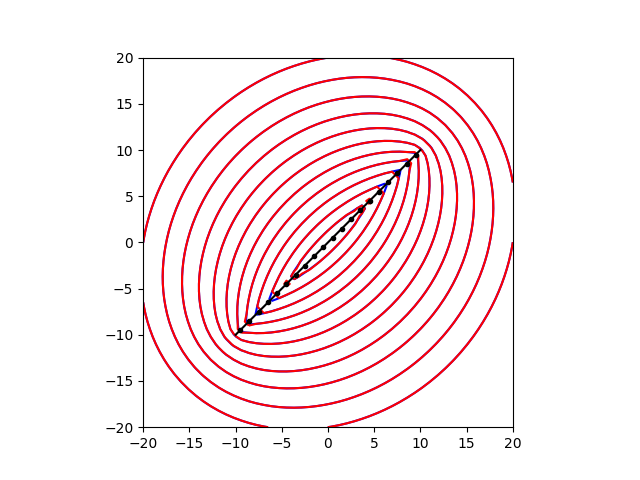

In [5]:
ml1.contour(-20, 20, 50, -20, 20, 50, [0], np.arange(20, 31, 1), color='b')
ml2.contour(-20, 20, 50, -20, 20, 50, [0], np.arange(20, 31, 1), color='r', newfig=False)

In [16]:
ml1 = ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = Constant(ml1, xr=0, yr=20, hr=30)
ls1 = HeadLineSinkHo(ml1, -10, -10, 10, 10, 20, order=7, layers=0)
ml1.solve()

Number of elements, Number of equations: 2 , 9
..
solution complete


In [11]:
ml2 = ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf2 = Constant(ml2, xr=0, yr=20, hr=30)
N = 50
d = 20 / N
xw = np.arange(-10 + d/2, 10, d)
yw = np.arange(-10 + d/2, 10, d)
for i in range(N):
    HeadWell(ml2, xw[i], yw[i], 20, layers=0)
ml2.solve(silent=True)
Qwell = 0
for i in range(N):
    Qwell += ml2.elementlist[i + 1].discharge()

In [12]:
print('discharge of line-sink:', ls1.discharge())
print('discharge of wells:', Qwell)

discharge of line-sink: [ 9430.28953368     0.        ]
discharge of wells: [ 9527.67795022     0.        ]


<IPython.core.display.Javascript object>


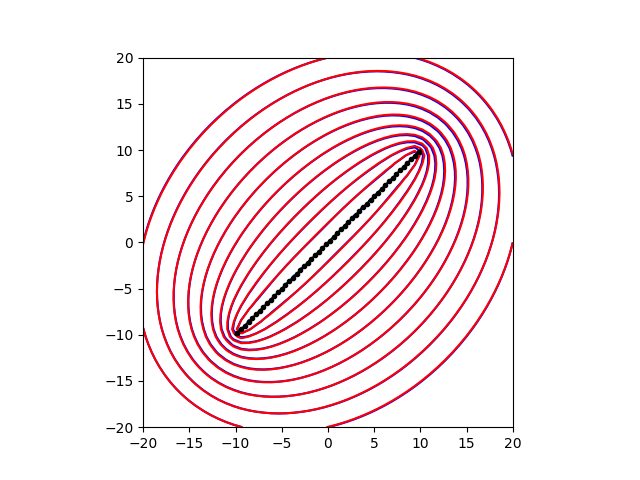

In [13]:
ml1.contour(-20, 20, 50, -20, 20, 50, [0], np.arange(20, 31, 1), color='b')
ml2.contour(-20, 20, 50, -20, 20, 50, [0], np.arange(20, 31, 1), color='r', newfig=False)

<IPython.core.display.Javascript object>


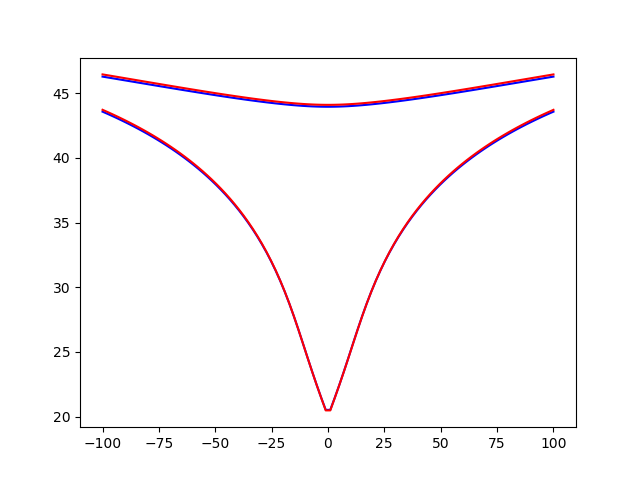

In [34]:
x = linspace(-100, 100, 100)
h1 = ml1.headalongline(x, 0)
h2 = ml2.headalongline(x, 0)
figure()
plot(x, h1.T, 'b')
plot(x, h2.T, 'r')